# Western AI Collective Workshop 1: 
## Introduction to Machine Learning
---

This notebook is intended to be used to follow along with Western AI Collective's first machine learning workshop.

In this notebook, we will cover 

* Handling Data
* Visualization
* Preprocessing Data
* Regression
  * Linear
  * Logistic
* Evaluation
* SVM
* KNN
* Artificial Neurons


## Imports
First we import some useful packages to make our lives easier.

#### Pandas
A third-party package created to allow for easier data handling and simple.

#### Matplotlib
A third-party package used for visualization.

#### Sci-Kit Learn
A third-party package that houses many algorithms so we don't have to implement the math for them.

In [0]:
import pandas
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np


## Handling Data

First we need to access our dataset. We'll use the *pandas* package to read the *Iris.csv* file.

### Pandas Dataframes
The core of panda's functionality relies on _DataFrames_. This is simply a class that contains your data. Read more about Dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame). DataFrames given us a lot of functionality that we would otherwise have to write ourselves (e.g. sorting by a column, selecting certain columns, plotting data).

In [0]:
data = pandas.read_csv("https://raw.githubusercontent.com/WesternAI/basic-machine-learning/master/Iris.csv")

In [0]:
# Dataframe.head() prints the first 5 rows of 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualization

It's always important to visualize our data before we try to tackle it.

Here we're going to plot each feature against the other to look for possible correlations, but visualization will be used throughout the workshop..

***Consider***: Which attributes of an Iris could you use to predict another? Was it obvious before seeing these plots?

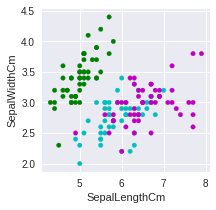

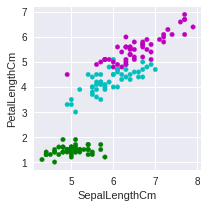

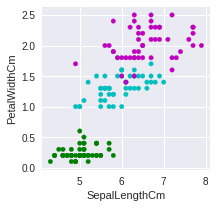

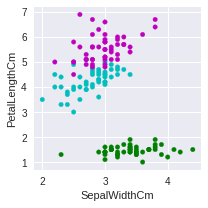

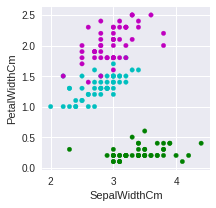

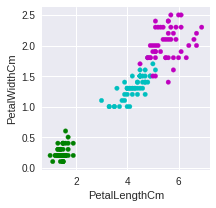

In [0]:
labels = data["Species"]
colors = {'Iris-setosa': 'g', 'Iris-versicolor': 'c', 'Iris-virginica': 'm'}
c = [colors[l] for l in labels]

data.plot("SepalLengthCm", "SepalWidthCm", "scatter", figsize=(3, 3), c=c)
data.plot("SepalLengthCm", "PetalLengthCm", "scatter", figsize=(3, 3), c=c)
data.plot("SepalLengthCm", "PetalWidthCm", "scatter", figsize=(3, 3), c=c)

data.plot("SepalWidthCm", "PetalLengthCm", "scatter", figsize=(3, 3), c=c)
data.plot("SepalWidthCm", "PetalWidthCm", "scatter", figsize=(3, 3), c=c)

data.plot("PetalLengthCm", "PetalWidthCm", "scatter", figsize=(3, 3), c=c)

## Preprocessing Data

Data is not always going to be as clean as this dataset and you will almost always need to process your data before you analyze it.

Possible reasons for preprocessing your data include:

 - Removing outliers
 - Normalizing data
 - Data augmentation
 - Reformatting data (what we'll be doing here)
 
 
 ### Reformatting Data
 
Currently our data has labels for each species of Iris. They're currently encoded as a string. Computers are always more effecient when using numbers, so lets assign a number to each species.

First we'll print out the unique values for the _Species_ column.

If you're not sure how to do this, try _Googling_ "pandas list unique values per column". Here's a good result that's straight forward: [List Unique Values In A pandas Column](https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/).

In [0]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Here we see that we have three species in the dataset:

 - Iris-setosa
 - Iris-versicolor
 - Iris-virginica
 
So we'll assign 0, 1, and 2 to represent each species respectively

There's many ways you can do this. Here we'll duplicate the species column and then replace each species in that column with the respective number.

In [0]:
# Create a new column with identical values to the "Species" column
data["NumberedSpecies"] = data["Species"]

In [0]:
# Lets see our new DataFrame
# DataFrame.sample(n) gives us "n" randomly selected rows
# if you run this multiple times you will get different rows selected
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,NumberedSpecies
63,64,6.1,2.9,4.7,1.4,Iris-versicolor,Iris-versicolor
103,104,6.3,2.9,5.6,1.8,Iris-virginica,Iris-virginica
31,32,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica,Iris-virginica
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa,Iris-setosa


In [0]:
# Now lets replace each occurence of species with it's corresponding number that
# we decided on earlier.
# Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2.
# We set inplace=True so that the replace function modifies the DataFrame instead
# of returning a new one

data["NumberedSpecies"].replace("Iris-setosa", 0, inplace=True)
data["NumberedSpecies"].replace("Iris-versicolor", 1, inplace=True)
data["NumberedSpecies"].replace("Iris-virginica", 2, inplace=True)

In [0]:
# Another way we could have done this is create a mapping from species to number
# so we only have to call replace once
# If you run this cell after running the previous one you'll get an error

species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
# data["NumberedSpecies"].replace(species_mapping, inplace=True)

In [0]:
# Another another way we could do this is to use dictionary comprehension to
# automatically generate the dictionary mapping, but this makes it a lot harder
# to understand our code at a glance.
# If you run this cell after running the previous ones you'll get an error

species_mapping = {species: number for number, species in enumerate(data["Species"].unique())}
print(species_mapping)
# data["NumberedSpecies"].replace(species_mapping, inplace=True)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [0]:
# Lets see what our data looks like now
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,NumberedSpecies
100,101,6.3,3.3,6.0,2.5,Iris-virginica,2
63,64,6.1,2.9,4.7,1.4,Iris-versicolor,1
112,113,6.8,3.0,5.5,2.1,Iris-virginica,2
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,1
38,39,4.4,3.0,1.3,0.2,Iris-setosa,0
90,91,5.5,2.6,4.4,1.2,Iris-versicolor,1
12,13,4.8,3.0,1.4,0.1,Iris-setosa,0
125,126,7.2,3.2,6.0,1.8,Iris-virginica,2
113,114,5.7,2.5,5.0,2.0,Iris-virginica,2
33,34,5.5,4.2,1.4,0.2,Iris-setosa,0


### Vis Time!

Let's see what we get when we plot this new label against our features.

***Consider:*** Which plots show us features that would be good to use to distinguish between species?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

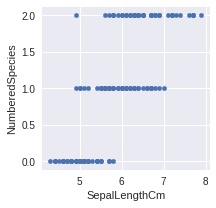

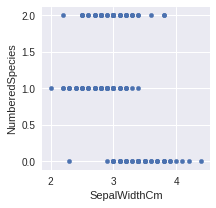

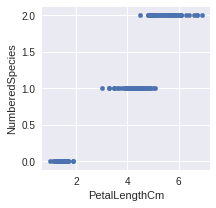

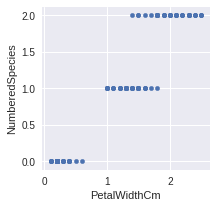

In [0]:
data.plot("SepalLengthCm", "NumberedSpecies", "scatter", figsize=(3, 3))
data.plot("SepalWidthCm", "NumberedSpecies", "scatter", figsize=(3, 3))
data.plot("PetalLengthCm", "NumberedSpecies", "scatter", figsize=(3, 3))
data.plot("PetalWidthCm", "NumberedSpecies", "scatter", figsize=(3, 3))

## Regression

Next we'll go over the simplest form of machine learning. Regression lays the foundation needed to understand many of the more complex machine learning algorithms, and even neural networks.

### Linear Regression

This type of regression is most commonly used to find the "line of best fit". The line of best fit is defined by a line that produces the least "error".

Error, in this case, is how _wrong_ a line put through the data is. In linear regression, the solution is presented as ***y = mx + b***, where 

> ***y*** is the value associated with that x value on the line

> ***m*** is the slope of the line

> ***x*** is the x value of a point on the line

> ***b*** is the y-intercept of the line

In order to find this line, we minimize an error function defined as the _distance between the predicted y value and the real y value for a given x value_.

Let's see what this looks like on our data.

Error: 0.32616666666666666


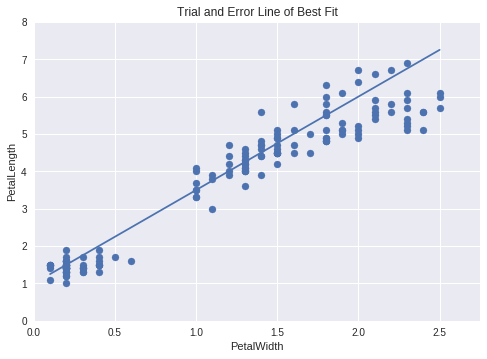

In [0]:
# First we have to decide why we're doing linear regression
# In our case, linear regression can be used to predict one attribute of an
# Iris from another attribute
# I chose to try to predict a flower's petal width using its petal length

# Variables for a line (of best fit) y = mx + b
m = 2.5
b = 1 

# For our line of best fit we need to know the range of our x values
min_x = data["PetalWidthCm"].min()
max_x = data["PetalWidthCm"].max()

# We use those to find the corresponding y values
min_y = m * min_x + b
max_y = m * max_x + b

# Calculate predictions for each point on the graph
# TODO: explain this in a text section
rss = 0
for x, y in zip(data["PetalWidthCm"], data["PetalLengthCm"]):
  y_pred = m * x + b
  rss += (y - y_pred)**2
rss = rss/len(data)
print("Error:", rss)

# Now we need to visualize what we have so far
# Here we're using matplotlib directly so we can plot two things on the same graph
plt.scatter(data["PetalWidthCm"], data["PetalLengthCm"]) # First we plot our scatter plot of our data
plt.plot([min_x, max_x], [min_y, max_y]) # Next we plot our line of best fit guess
plt.xlim(0, 2.75)
plt.ylim(0, 8)
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.title("Trial and Error Line of Best Fit")
pass # This line just prevents unneccessary prints

As you can see, that was a bad guess, but we can adjust the variables ***m*** and ***b*** to make it fit closer to our data. (*Hint*: try **m** = 0.4, **b** = -0.5)

Think about what you're doing here. You see that the line looks _bad_ so you change the values to get closer and closer. That's all a computer does when it performs linear regression.

So lets see how we can do the same thing with sklearn.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


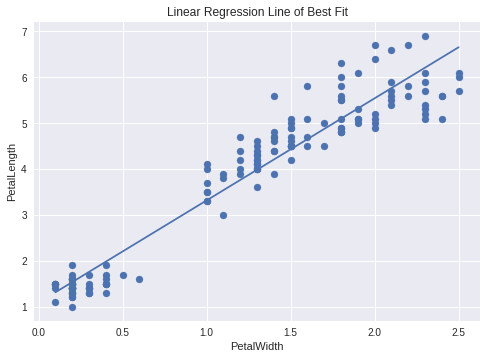

In [0]:
# Import the model that will do the linear regression for us
from sklearn.linear_model import SGDRegressor

# Create an instance of that model
model = SGDRegressor(max_iter=1000) # Try changing the eta0

# Fit our model to the data
X_train = [ [d] for d in data["PetalWidthCm"].values ]
y_train = [ [d] for d in data["PetalLengthCm"].values ]
model.fit(X_train, y_train)

# Get the fitted function
m = model.coef_[0]
b = model.intercept_[0]

# For our line of best fit we need to know the range of our x values
min_x = data["PetalWidthCm"].min()
max_x = data["PetalWidthCm"].max()

# We use those to find the corresponding y values
min_y = m * min_x + b
max_y = m * max_x + b

# Now we need to visualize what we have so far
# Here we're using matplotlib directly so we can plot two things on the same graph
plt.scatter(data["PetalWidthCm"], data["PetalLengthCm"]) # First we plot our scatter plot of our data
plt.plot([min_x, max_x], [min_y, max_y]) # Next we plot our line of best fit guess
plt.xlabel("PetalWidth")
plt.ylabel("PetalLength")
plt.title("Linear Regression Line of Best Fit")
pass

### Logistic Regression

Logistic regression is useful for binary problems, which means you want a yes or no answer. You can think of the output of a logisitic regression as a probability of how your input fits into an output class.

Here, we'll use our model to tell the difference between the types of flower using the petal width.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.84

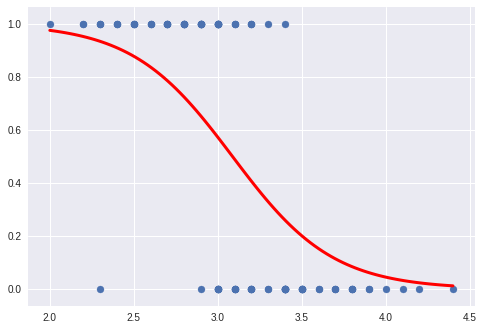

In [0]:
# Import our model
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create an instance of that model
model = LogisticRegression(solver="lbfgs")
feature = "SepalWidthCm"

# Fit our model to the data
data_0 = data.loc[data["NumberedSpecies"]==0]
data_1 = data.loc[data["NumberedSpecies"]==1]
data_subset = pandas.concat([data_0, data_1])
X_train = [ [d] for d in data_subset[feature].values ]
y_train = [ [d] for d in data_subset["NumberedSpecies"].values ]
model.fit(X_train, y_train)

# Get the fitted function
m = model.coef_[0][0]
b = model.intercept_[0]

# For our line of best fit we need to know the range of our x values
min_x = data_subset[feature].min()
max_x = data_subset[feature].max()
X_test = np.linspace(min_x, max_x, 100)
loss = 1 / (1 + np.exp(X_test * model.coef_ + model.intercept_)).ravel()

# We use those to find the corresponding y values
# min_y = m * min_x + b
# max_y = m * max_x + b

# Now we need to visualize what we have so far
# Here we're using matplotlib directly so we can plot two things on the same graph
plt.scatter(data_subset[feature], data_subset["NumberedSpecies"]) # First we plot our scatter plot of our data
# plt.plot([min_x, max_x], [min_y, max_y]) # Next we plot our line of best fit guess

# loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, 1-loss, color='red', linewidth=3)
# print("Score = ".join(str(model.score(X_train, y_train))))
model.score(X_train, y_train)

###Multi-Class Logistic Regression

We will now expand the scope of the logistic regression problem by making predictions from multiple features for three binary classes.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


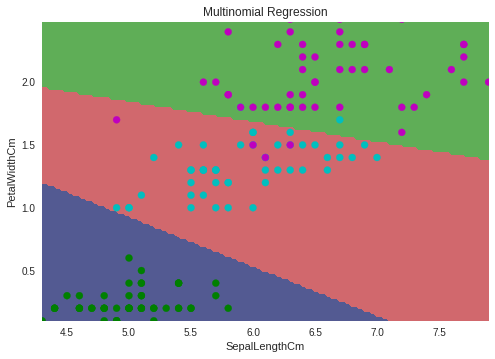

In [0]:
# Import our model
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create an instance of that model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
features = ["SepalLengthCm", "PetalWidthCm"]
data_subset = data[features]

# Fit our model to the data
X_train = [ d for d in data_subset.values ]
y_train = [ [d] for d in data["NumberedSpecies"].values ]
model.fit(X_train, y_train)

# Get the fitted function
m = model.coef_[0][0]
b = model.intercept_[0]

# For our line of best fit we need to know the range of our x values

# create a mesh to plot in
h = .02  # step size in the mesh
x_min = data_subset[features[0]].min()
x_max = data_subset[features[0]].max()
y_min = data_subset[features[1]].min()
y_max = data_subset[features[1]].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=ListedColormap(('#535A92', '#D1686D', '#5FAE57')))
plt.title("Multinomial Regression")
plt.axis('tight')
plt.xlabel(features[0])
plt.ylabel(features[1])

# Plot also the training points
labels = data["Species"]
colors = {'Iris-setosa': 'g', 'Iris-versicolor': 'c', 'Iris-virginica': 'm'}
c = [colors[l] for l in labels]
plt.scatter(data[features[0]], data[features[1]], c=c)
    
# Plot the three one-against-all classifiers
# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()
# coef = model.coef_
# intercept = model.intercept_

# def plot_hyperplane(c, color):
#     def line(x0):
#         return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
#     plt.plot([xmin, xmax], [line(xmin), line(xmax)],
#              ls="--", color=color)

# for i, color in zip(model.classes_, colors):
#     plot_hyperplane(i, color)
    

## Support Vector Machines

Support vector machines are used for classification problems, in which we want to classify our data into two distinct categories. The categories are in some way different from each other, but a data point in one category are very similar to another data point in the same category. 

By visualizing our data, we can see that the different classes cluster together.

In [0]:
labels = data["Species"]
colors = {'Iris-setosa': 'g', 'Iris-versicolor': 'c', 'Iris-virginica': 'm'}
c = [colors[l] for l in labels]

data.plot("SepalLengthCm", "SepalWidthCm", "scatter", figsize=(3, 3), c=c)
data.plot("SepalLengthCm", "PetalLengthCm", "scatter", figsize=(3, 3), c=c)
data.plot("SepalLengthCm", "PetalWidthCm", "scatter", figsize=(3, 3), c=c)

data.plot("SepalWidthCm", "PetalLengthCm", "scatter", figsize=(3, 3), c=c)
data.plot("SepalWidthCm", "PetalWidthCm", "scatter", figsize=(3, 3), c=c)

data.plot("PetalLengthCm", "PetalWidthCm", "scatter", figsize=(3, 3), c=c)

As you can see from the scatter plots, there is a clear delineation between clusters of data. Even better, the data appears to be linearly seperable, meaning that a single straight line can completely separate the data into distinct clusters.

In [0]:
from sklearn.svm import SVC

X = data.iloc[:, [3, 4]].values
y = []
# Convert species string into number format
for d in data["Species"]:
  if d == "Iris-setosa":
    y.append(0) # 0 = Iris-setosa
  elif d == "Iris-versicolor":
    y.append(1) # 1 = Iris-versicolor
  else:
    y.append(2) # 2 = Iris-virginica

# Break the data into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Create support vector classifier
classifier = SVC(kernel = "linear") # Kernel -> what type of "line" that you are drawing to classify the data
classifier.fit(X_train, y_train) # Fit the classifier based on the X and Y training data

X_set, y_set = X_train, y_train
X_min1 = X_set[:, 0].min() - 1
X_max1 = X_set[:, 0].max() + 1
X_min2 = X_set[:, 1].min() - 1
X_max2 = X_set[:, 1].max() + 1

# Create a meshgrid that will be used to generate the scatter plot
X1, X2 = np.meshgrid(
  np.arange(start = X_min1, stop = X_max1, step = 0.01),
  np.arange(start = X_min2, stop = X_max2, step = 0.01)
)

# Draw contour lines to illustrate the separation of data into clusters 
plt.contourf(
  X1,
  X2,
  classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
  alpha = 0.75,
  cmap = ListedColormap(('#535A92', '#D1686D', '#5FAE57'))
)

# Loop over all the unique data points and plot them on the scatter
for i, j in enumerate(np.unique(y_set)):
  # Add labels corresponding to the Iris species specified earlier
  if (j == 0):
    label = 'Iris-setosa'
  elif (j == 1):
    label = 'Iris-versicolor'
  else:
    label = 'Iris-virginica'
  plt.scatter(
    X_set[y_set == j, 0],
    X_set[y_set == j, 1],
    c = ListedColormap(('#181F58', '#7D151A', '#196811'))(i),
    label = label
  )

plt.title('SVM (Training set)') # Add title of the output graph
plt.xlabel('Petal Length (cm)') # Add x-axis label of the output graph
plt.ylabel('Petal Width (cm)') # Add y-axis label of the output graph
plt.xlim(X1.min(), X1.max()) # Set the x-axis limit to the minimum and maximum x values
plt.ylim(X2.min(), X2.max()) # Set the y-axis limit to the minimum and maximum y values
plt.legend() # Display the legend
plt.show() # Show the graph


# K Nearest Neighbours

This is one of the most simple to understand algorithms, used when you have a 'field' of data. When a predicition is made, the model looks at all the training data and makes a prediction by looking at the 'k' nearest points on the graph.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

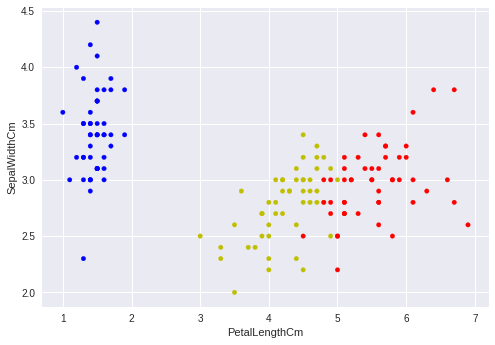

In [0]:
# Import our model
from sklearn.neighbors import KNeighborsClassifier

# Instatiate the model 
model = KNeighborsClassifier(n_neighbors=3)

# Choose two features to use
feature1 = "PetalLengthCm"
feature2 = "SepalWidthCm"

# Get data from the dataset
features = data[[feature1, feature2]]
labels = data["NumberedSpecies"]

# Choose a color based on what the flower is labeled as
colors = ['b', 'y', 'r']
c = [colors[l] for l in labels]
features.plot(0, 1, kind="scatter", c=c)

# `Train` the model on the given data
model.fit(features, labels)

petal length: 5
sepal width: 3.25
Iris-virginica


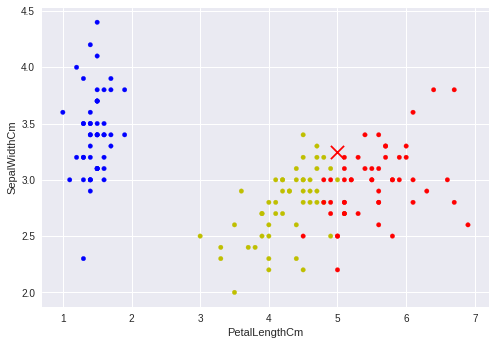

In [0]:
# Choose a color based on what the flower is labeled as
colors = ['b', 'y', 'r']
c = [colors[l] for l in labels]
features.plot(0, 1, kind="scatter", c=c)

# Get input to use in a prediction
petal_length = float(input("petal length: "))
sepal_width = float(input("sepal width: "))

# Use the model to predict the class
flower_prediction = model.predict([[petal_length, sepal_width]])[0]

# Convert output to flower name
print(data.Species.unique()[flower_prediction])

# Plot the point and the labelled class
plt.scatter(petal_length, sepal_width, c=colors[flower_prediction], marker='x', s=175)

# Evaluation

There are many ways to evaluate the our models:

 * error functions
 * accuracy
 * train/test/validation datasets

 
**Training set:** used to actually create/build the model.
 
**Validation set:** is used to see if any overfitting is occurring. Overfitting occurs when the model begins to fit the training set better than it fits any new data that it is receiving. This means that the accuracy of the model will increase when given the training set, but stays the same when used on the validation set.

 ![Overfitting](https://cdn-images-1.medium.com/max/1600/1*u2MTHaUPMJ8rkTYjm2nHww.gif)

**Test set:** used to assess the predictive power of the model with data that it has not seen before.

